# Classification

<img src="./imgs/CRT.png" />

**Objectives**:¶
At the end of this notebook the students should:   

* Be able to visualize data   
* Perform EDA in order to understand the relationship between dependent & independent variables.  
* Understand how Logistic Regression, Decision Tree, Random Forest models work   
* Understand when use certain classification metrics and how to use them.  
* Do basic feature engineering and selection to improve models  
* Be able to create classification models in : sklearn     

Data:  
We'll take a look at: [Heart Disease classification dataset](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease)


In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

In [22]:
df=pd.read_csv('data/heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [23]:
# Take a look at numerical variables
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [24]:
# Take a look at categorical variables
df.describe(include=['object'])

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


### Step # 1  Basic Preprocessing for Logistic Regression Algo

In [25]:
### Basic Preprocessing : 

df_clean=df.copy()

for col in ['HeartDisease','Smoking','Stroke','AlcoholDrinking','DiffWalking','Diabetic','PhysicalActivity','Asthma','KidneyDisease','SkinCancer']:
    df_clean[col]=df_clean[col].apply(lambda x: 1 if x=='Yes' else 0)

In [26]:
df_clean['Sex']=df_clean.Sex.apply(lambda x: 1 if x=='Male' else 0)

In [27]:
df_clean.AgeCategory.value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [28]:
df_clean.AgeCategory=df_clean.AgeCategory.apply(lambda x :x.split('-')[0].split(' ')[0]).astype(int)

In [29]:
df_clean.AgeCategory.dtype

dtype('int64')

In [30]:
df_clean.AgeCategory.value_counts()

65    34151
60    33686
70    31065
55    29757
50    25382
80    24153
45    21791
75    21482
18    21064
40    21006
35    20550
30    18753
25    16955
Name: AgeCategory, dtype: int64

### Step #2) Basic EDA

In [31]:
df_clean.HeartDisease.value_counts()

0    292422
1     27373
Name: HeartDisease, dtype: int64

#### Investigate Class Balance

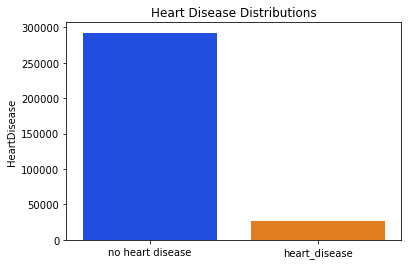

In [32]:
# A classic case of imbalanced data! 
labels=['no heart disease','heart_disease']
sns.barplot(x=labels,y=df_clean.HeartDisease.value_counts(),palette='bright')
plt.title('Heart Disease Distributions');

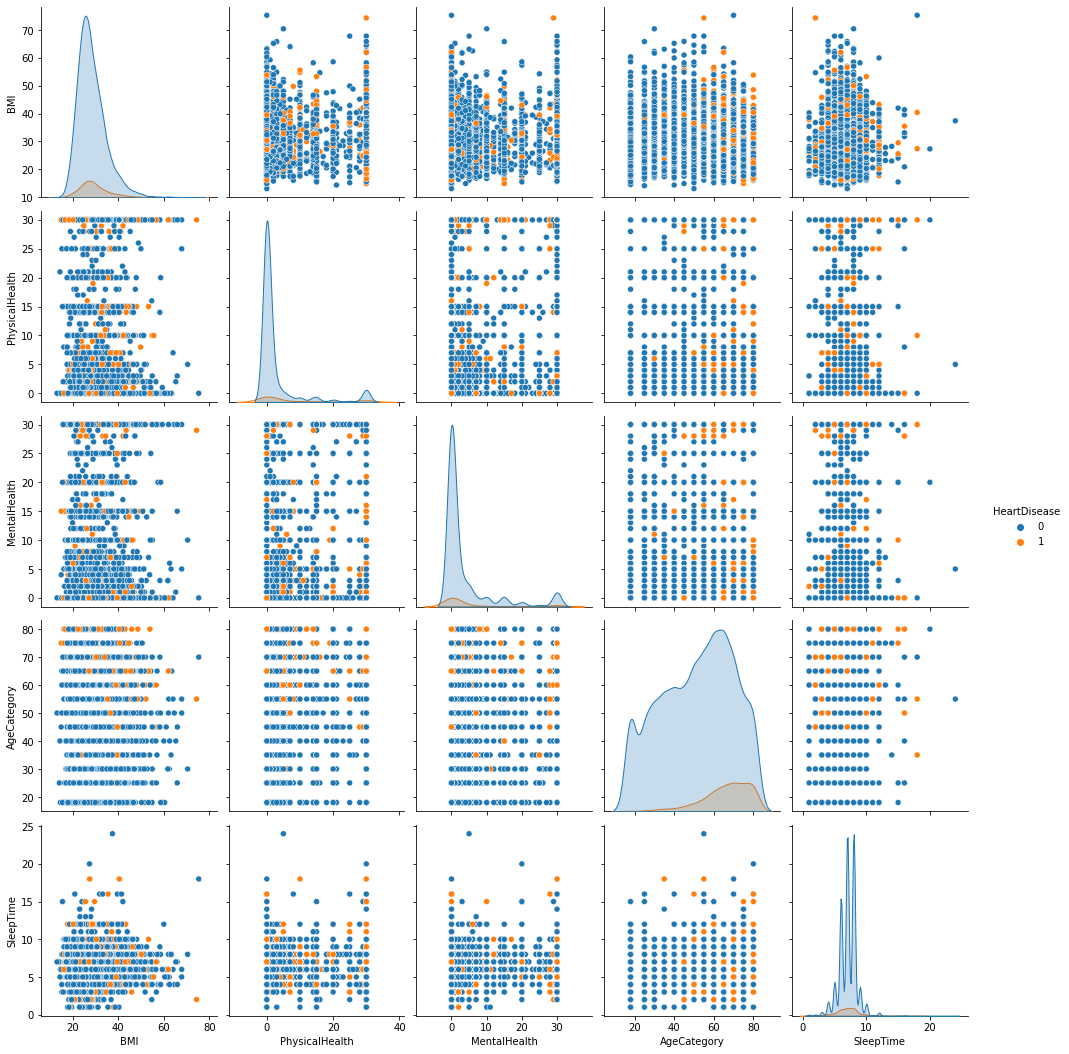

In [33]:
# Warning : may take a couple of minutes to run
df_samp=df_clean[['HeartDisease', 'BMI','PhysicalHealth', 'MentalHealth','AgeCategory','SleepTime']].sample(10000)
g=sns.pairplot(df_samp, hue='HeartDisease');
g.fig.set_size_inches(15,15)

### Step #3 Develop a Baseline model using Logistic Regression

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [35]:
df_clean.dtypes

HeartDisease          int64
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int64
Sex                   int64
AgeCategory           int64
Race                 object
Diabetic              int64
PhysicalActivity      int64
GenHealth            object
SleepTime           float64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
dtype: object

In [36]:
# stick with numerical features for now
df_num=df_clean.drop(['GenHealth','Race'],1)

/var/folders/jn/625fnnbs1jg77y82ld96q65w0000gn/T/ipykernel_3656/2029450273.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_num=df_clean.drop(['GenHealth','Race'],1)


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

### Logistic Regression Model 

Logistic regression = sigmoid + decision Rule   

where **sigmoid**  is a mapping: 


<img src="https://www.gstatic.com/education/formulas2/443397389/en/sigmoid_function.svg" />

(where x is) : 
$$
x = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + \beta_4X_4 + \beta_5X_5  .. .
$$

<img src="./imgs/logistic_1.png" />


Other advantages of Logistic Regression: 

-  Interpretability 
-  Ranked probabilities

In [38]:
X=df_num.drop(columns=['HeartDisease'],axis=1)
y=df_num.HeartDisease 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
# Partition remaining data into train/validation for 60, 20, 20 divide
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 123)

clf=LogisticRegression(max_iter=1000).fit(X_train,y_train)

print('Accuracy Score: {:6.3f}'.format(clf.score(X_val,y_val)))
probas=clf.predict_proba(X_val)[:,1]
print('ROC AUC Score: {:6.3f}'.format(roc_auc_score(y_val,probas)))

Accuracy Score:  0.917
ROC AUC Score:  0.830


###  Performance Metrics

### Confusion Matrix : 


<img src="https://miro.medium.com/max/1400/1*VSchph99Wiv6tQpNIvMJbw.png" />

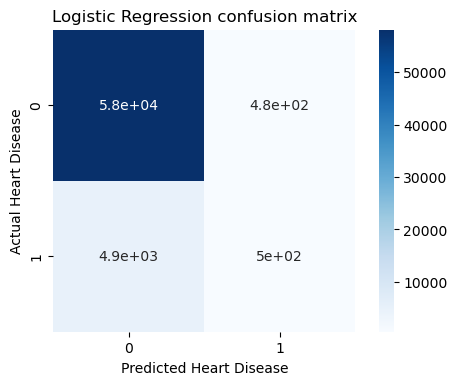

In [41]:
### Confusion Matrix

logtistic_confusion = confusion_matrix(y_val, clf.predict(X_val))
plt.figure(dpi=100)
sns.heatmap(logtistic_confusion, cmap=plt.cm.Blues, annot=True, square=True,
           xticklabels=clf.classes_,
           yticklabels=clf.classes_)

plt.xlabel('Predicted Heart Disease')
plt.ylabel('Actual Heart Disease')
plt.title('Logistic Regression confusion matrix');

0    58602
1     5357
Name: HeartDisease, dtype: int64

In [22]:
logtistic_confusion

array([[57838,   470],
       [ 5134,   517]])

### What  is Accuracy ? 

Accuracy = (TP + TN) / (TP + TN + FN + FP)   
(57398 + 79) / (57398 + 79+ 5572 + 910 )

### Why is Accuracy misleading in this case ? 

(57398 ) / (57398 + 79+ 5572 + 910 ) ~ .90  (i.e. even when TP=0 , accuracy is still high)

### What is AUC score? 

The AUC metric is a decent metric to use when we are dealing with imbalanced data. 


[from sklearn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py)
*ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better*


<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_roc_001.png" />

### Other Classification Metics 

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/d37e557b5bfc8de22afa8aad1c187a357ac81bdb" />
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/dd577aee2dd35c5b0e349327528a5ac606c7bbbf" />
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/49d1ff4917ee4c464f6efbee08735b4a8694e8c0" />

In [ ]:
# Often times for medical data, we want to prioritize Recall (ie, minimize False Negatives!)

# BTW, High number of False Negatives (not good) .. 

### Thresholding : 



In [124]:
def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    try: 
        y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    except:
        # adding functionality for xgboost 
        y_predict = (model.predict(X_test)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['legit', 'fraud'],
           yticklabels=['legit', 'fraud']);
    plt.xlabel('prediction')
    plt.ylabel('actual')

In [46]:
from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix(clf, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

###  Let's proceed using AUC, which should allow us to track the overall model performance (at any threshold)

In [47]:
# #  Move this . 
# feat_df=pd.DataFrame({'coef':clf.coef_[0],'features':X.columns,'abs_val_coef':np.abs(clf.coef_[0])}).sort_values(by='abs_val_coef')
# feat_df.tail(100)

### Step #4  Add Categorical Variables

In [25]:
df_clean.dtypes

HeartDisease          int64
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int64
Sex                   int64
AgeCategory           int64
Race                 object
Diabetic              int64
PhysicalActivity      int64
GenHealth            object
SleepTime           float64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
dtype: object

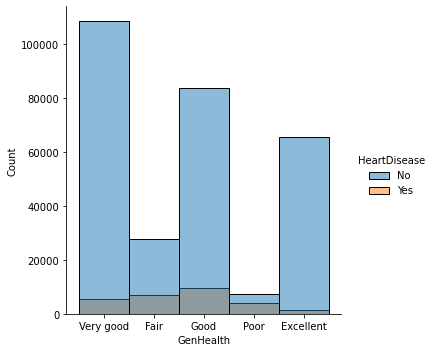

In [26]:
sns.displot(df[['HeartDisease','GenHealth']],x='GenHealth',hue='HeartDisease',bins=15)

In [70]:
df_comb=df_num.join(df_clean[['GenHealth']])

health_map={'Poor':1,'Fair':2,'Good':3,'Very good':4,'Excellent':5}
df_comb.GenHealth=df_comb.GenHealth.map(health_map)

df_comb.GenHealth.value_counts(dropna=False)

4    113858
3     93129
5     66842
2     34677
1     11289
Name: GenHealth, dtype: int64

### Exercise : 

* Iteratively add the GenHealth (numerical feature) & Race Categorical feature, retain variables if AUC score increases  

In [71]:
X=df_comb.drop(columns=['HeartDisease'],axis=1)
y=df_comb.HeartDisease 

# note, that the test set is still 'the same' as before, because the random seed is the same, 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
# Partition remaining data into train/validation for 60, 20, 20 divide
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 123)


In [72]:
clf=LogisticRegression(max_iter=1000).fit(X_train,y_train)
probas=clf.predict_proba(X_val)[:,1]
print('ROC AUC Val Score: {:6.3f}'.format(roc_auc_score(y_val,probas)))

ROC AUC Val Score:  0.841


In [36]:
df.Race.value_counts()

White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64

In [73]:
race_cats=df[['Race']].replace('Other','AAother')
race_cats=pd.get_dummies(race_cats,drop_first=True)
race_cats.head()

,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_White
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [74]:
df_comb=df_comb.join(race_cats)
X=df_comb.drop(columns=['HeartDisease'],axis=1)
y=df_comb.HeartDisease 

# note, that the test set is still 'the same' as before, because the random seed is the same, 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
# Partition remaining data into train/validation for 60, 20, 20 divide
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 123)


In [75]:
clf=LogisticRegression(max_iter=1000).fit(X_train,y_train)
probas=clf.predict_proba(X_val)[:,1]
print('ROC AUC Val Score: {:6.3f}'.format(roc_auc_score(y_val,probas)))

ROC AUC Val Score:  0.841


### Step #5  Deeper look at numerical features

Text(0.5, 1.0, 'Heart Disease vs Age')

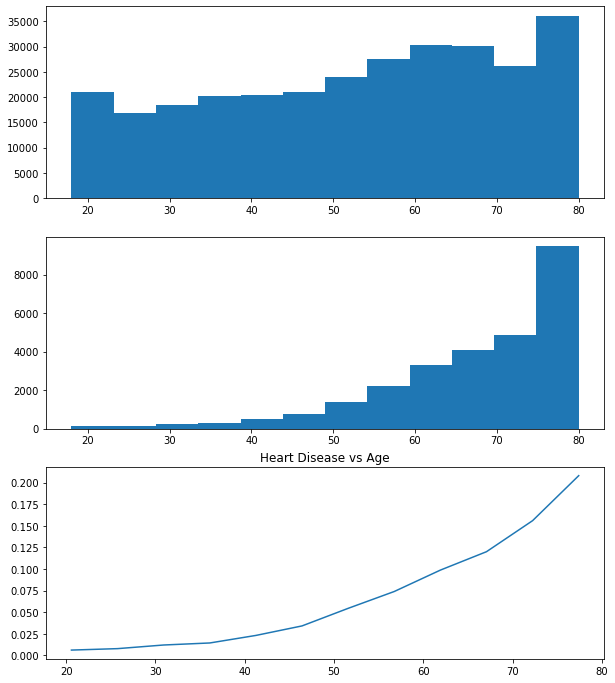

In [26]:
fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 Rows, 1 Col

count0, bins_0, _ = ax[0].hist(df_num.loc[(df_num.HeartDisease==0),'AgeCategory'], bins=12)
count1, bins_1, _ = ax[1].hist(df_num.loc[(df_num.HeartDisease==1),'AgeCategory'], bins=12)
ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0))
plt.title('Heart Disease vs Age')

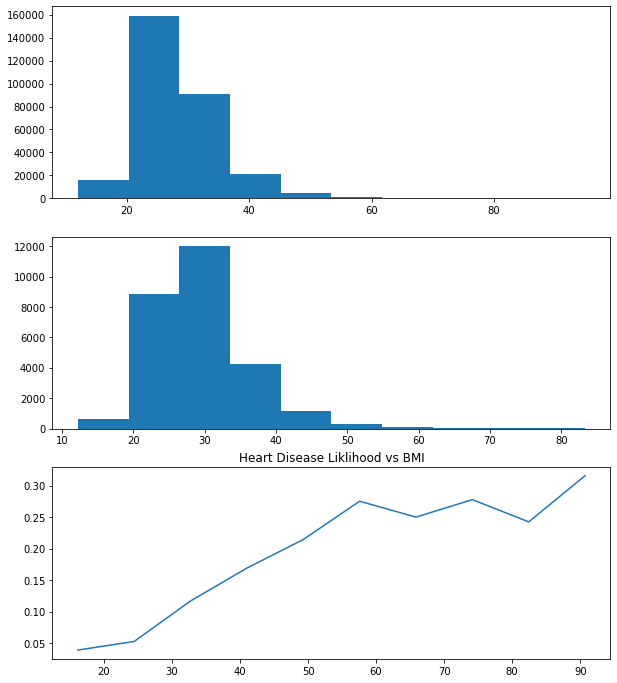

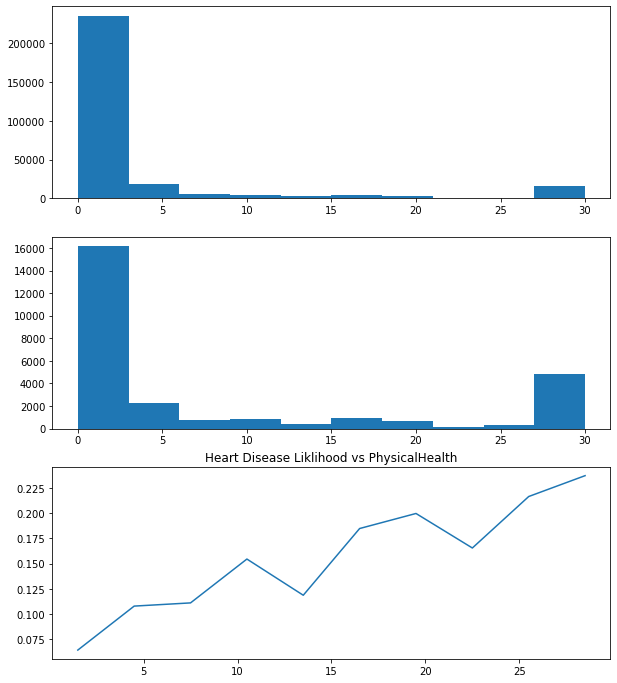

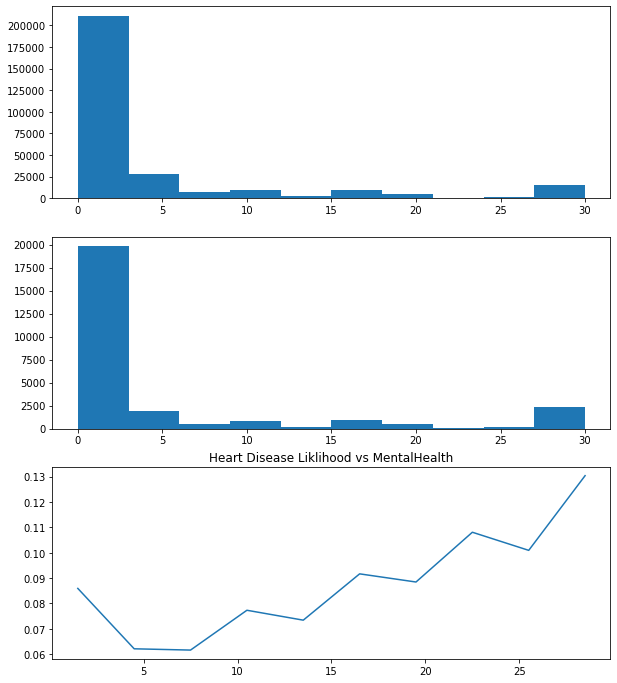

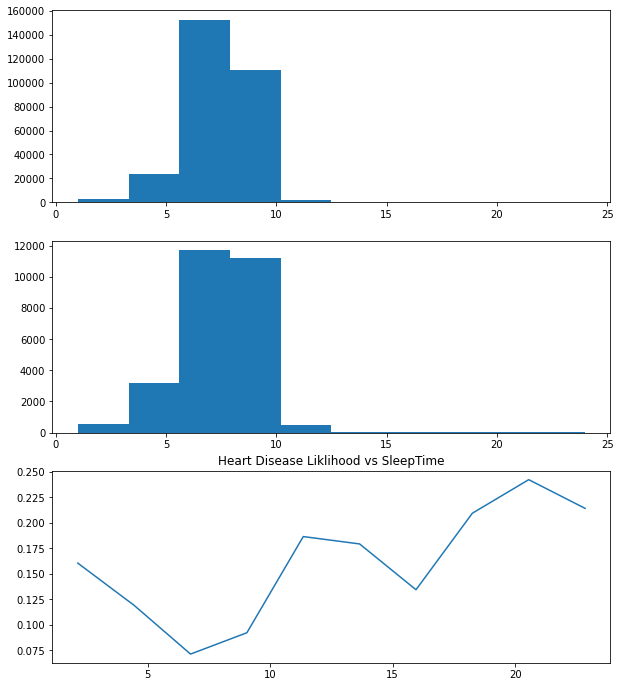

In [44]:
# #
for i in ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']:
    fig, ax = plt.subplots(3, 1, figsize=(10, 12))  # 3 Rows, 1 Col

    count0, bins_0, _ = ax[0].hist(df_num.loc[(df_num.HeartDisease==0),i])
    count1, bins_1, _ = ax[1].hist(df_num.loc[(df_num.HeartDisease==1),i])
    ax[2].plot((bins_0[:-1]+bins_0[1:])/2,count1/(count1 + count0))
    plt.title('Heart Disease Liklihood vs '+i)

### Exercise  : 

* Try to convert SleepTime into a categorical, does performance improve? 

In [42]:
def sleep_map(x):
    if x >= 6 and x< 9:
        return 'six_eight'
    elif x >=9:
        return 'over_eight'
    else:
        return 'less_than_six'

In [43]:
df_comb['sleep_cats']=df_comb.SleepTime.apply(sleep_map)
sleep_dummies=pd.get_dummies(df_comb['sleep_cats'],drop_first=True)
df_comb=df_comb.join(sleep_dummies)

In [75]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
# Partition remaining data into train/validation for 60, 20, 20 divide
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 123)

clf=LogisticRegression(max_iter=1000).fit(X_train,y_train)

#probas_train=clf.predict_proba(X_train)[:,1]
#print('ROC AUC Train Score: {:6.3f}'.format(roc_auc_score(y_train,probas_train)))

probas=clf.predict_proba(X_val)[:,1]
print('ROC AUC Val Score: {:6.3f}'.format(roc_auc_score(y_val,probas)))

ROC AUC Val Score:  0.841


In [64]:
X_train.columns

Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Diabetic',
       'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer'],
      dtype='object')

### Step #6  :  Add Class Balance

In [76]:
clf=LogisticRegression(max_iter=1000,class_weight='balanced').fit(X_train,y_train)
probas_train=clf.predict_proba(X_train)[:,1]
print('ROC AUC Train Score: {:6.3f}'.format(roc_auc_score(y_train,probas_train)))

probas=clf.predict_proba(X_val)[:,1]
print('ROC AUC Val Score: {:6.3f}'.format(roc_auc_score(y_val,probas)))

ROC AUC Train Score:  0.841
ROC AUC Val Score:  0.842


In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [77]:
## GridSearch optimal parameters : 

# rerun to get full X_train (since we are using CV here . .)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

params= {'C': np.logspace(-3,3,7),'class_weight':[{0:1,1:1},{0:1,1:2},{0:1,1:3},{0:1,1:4}]}

model_name = "lr_model"
model_log="_lr"

Grid=GridSearchCV(estimator=clf, param_grid=params, scoring='roc_auc',
                  n_jobs=-1, cv=3, verbose=3)
model = Pipeline([
    ('scaling', StandardScaler()), 
    ('classification', Grid)
]).fit(X_train,y_train)

globals()['Grid%s' % model_log]=pd.DataFrame(Grid.cv_results_)

Fitting 3 folds for each of 28 candidates, totalling 84 fits
[CV 1/3] END C=0.001, class_weight={0: 1, 1: 3};, score=0.842 total time=   0.6s
[CV 3/3] END .C=0.01, class_weight={0: 1, 1: 1};, score=0.839 total time=   0.3s
[CV 2/3] END .C=0.01, class_weight={0: 1, 1: 4};, score=0.843 total time=   0.2s
[CV 3/3] END ..C=0.1, class_weight={0: 1, 1: 2};, score=0.839 total time=   0.4s
[CV 3/3] END ..C=1.0, class_weight={0: 1, 1: 1};, score=0.839 total time=   0.4s


/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 2/3] END C=0.001, class_weight={0: 1, 1: 3};, score=0.843 total time=   0.6s
[CV 2/3] END .C=0.01, class_weight={0: 1, 1: 1};, score=0.842 total time=   0.3s
[CV 1/3] END .C=0.01, class_weight={0: 1, 1: 4};, score=0.842 total time=   0.3s
[CV 2/3] END ..C=0.1, class_weight={0: 1, 1: 2};, score=0.842 total time=   0.4s
[CV 2/3] END ..C=1.0, class_weight={0: 1, 1: 2};, score=0.842 total time=   0.3s
[CV 2/3] END C=0.001, class_weight={0: 1, 1: 2};, score=0.843 total time=   0.6s
[CV 1/3] END C=0.001, class_weight={0: 1, 1: 4};, score=0.842 total time=   0.2s
[CV 2/3] END .C=0.01, class_weight={0: 1, 1: 2};, score=0.842 total time=   0.3s
[CV 3/3] END .C=0.01, class_weight={0: 1, 1: 4};, score=0.839 total time=   0.2s
[CV 2/3] END ..C=0.1, class_weight={0: 1, 1: 3};, score=0.843 total time=   0.3s
[CV 1/3] END ..C=1.0, class_weight={0: 1, 1: 1};, score=0.842 total time=   0.4s
[CV 3/3] END ..C=1.0, class_weight={0: 1, 1: 3};, score=0.839 total time=   0.3s
[CV 3/3] END C=0.001, class_

In [78]:
Grid_lr.sort_values(by='mean_test_score').tail()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
7,0.214910,0.021735,0.021250,0.000425,0.01,"{0: 1, 1: 4}","{'C': 0.01, 'class_weight': {0: 1, 1: 4}}",0.841647,0.842590,0.839125,0.841121,0.001463,5
0,0.599316,0.035793,0.047252,0.012555,0.001,"{0: 1, 1: 1}","{'C': 0.001, 'class_weight': {0: 1, 1: 1}}",0.841671,0.842530,0.839176,0.841125,0.001423,4
1,0.550470,0.019645,0.051889,0.007789,0.001,"{0: 1, 1: 2}","{'C': 0.001, 'class_weight': {0: 1, 1: 2}}",0.841746,0.842652,0.839245,0.841215,0.001441,3
2,0.432930,0.200597,0.035302,0.010295,0.001,"{0: 1, 1: 3}","{'C': 0.001, 'class_weight': {0: 1, 1: 3}}",0.841753,0.842695,0.839269,0.841239,0.001445,2
3,0.169273,0.005246,0.024007,0.003059,0.001,"{0: 1, 1: 4}","{'C': 0.001, 'class_weight': {0: 1, 1: 4}}",0.841747,0.842721,0.839287,0.841252,0.001445,1


In [63]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
# Partition remaining data into train/validation for 60, 20, 20 divide
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 123)

clf=LogisticRegression(class_weight={0: 1, 1: 4},C=.001).fit(X_train,y_train)
probas_train=clf.predict_proba(X_train)[:,1]
print('ROC AUC Train Score: {:6.3f}'.format(roc_auc_score(y_train,probas_train)))

probas=clf.predict_proba(X_val)[:,1]
print('ROC AUC Val Score: {:6.3f}'.format(roc_auc_score(y_val,probas)))

ROC AUC Train Score:  0.827
ROC AUC Val Score:  0.828


/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Final Interpretative Model & Feature Interpreation

In [79]:
clf=LogisticRegression(max_iter=1000,class_weight='balanced').fit(X_train,y_train)
probas_train=clf.predict_proba(X_train)[:,1]
print('ROC AUC Train Score: {:6.3f}'.format(roc_auc_score(y_train,probas_train)))

probas=clf.predict_proba(X_val)[:,1]
print('ROC AUC Val Score: {:6.3f}'.format(roc_auc_score(y_val,probas)))

probas_test=clf.predict_proba(X_test)[:,1]
print('ROC AUC Test Score: {:6.3f}'.format(roc_auc_score(y_test,probas_test)))

ROC AUC Train Score:  0.841
ROC AUC Val Score:  0.842
ROC AUC Test Score:  0.840


In [80]:
pd.DataFrame({'coef':clf.coef_[0],'exp_coef':np.exp(clf.coef_[0]),'abs_coef':np.abs(clf.coef_[0]),
                                                    'features':X.columns}).sort_values(by='abs_coef').tail()



,coef,exp_coef,abs_coef,features
9,0.502679,1.653144,0.502679,Diabetic
15,-0.513205,0.598574,0.513205,GenHealth
13,0.604638,1.830590,0.604638,KidneyDisease
7,0.756469,2.130738,0.756469,Sex
3,1.241782,3.461776,1.241782,Stroke


Interpretation of the Top Features : 

1) Previous stroke is associated with increased odds of Heart Disease by a factor of 3.46   
2) Male gender is associated with increased odds of Heart Disease by a factor of 2.13  
..  
4) Increase of one unit of GenHealth is associated with decreased odds of factor .598

### Tree-Based Models

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn import tree

#### Decision Trees

In [85]:
dt = DecisionTreeClassifier(max_depth=2,criterion="entropy")
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [81]:
y_train.value_counts()

0    234114
1     21722
Name: HeartDisease, dtype: int64

In [89]:
#  why did the tree split on 52.5 ? 
# it is common to consider only split points at certain percentiles of the distribution of values. For example, we may consider every tenth percentile (that is, 10%, 20%, 30%, etc).

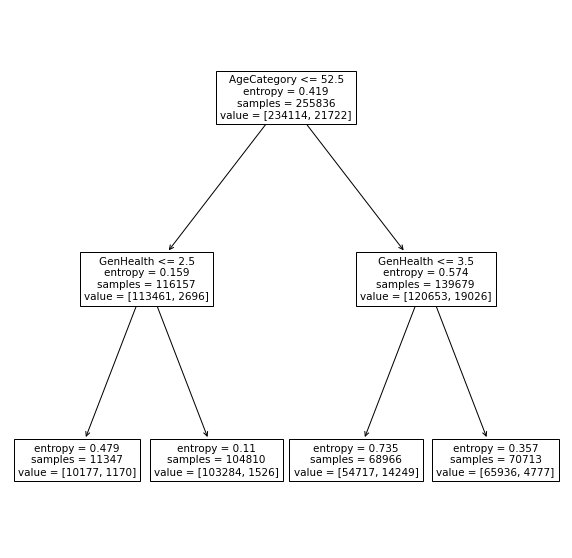

[CV 1/3] END .C=10.0, class_weight={0: 1, 1: 3};, score=0.842 total time=   0.3s
[CV 1/3] END C=100.0, class_weight={0: 1, 1: 3};, score=0.842 total time=   0.2s
[CV 3/3] END C=100.0, class_weight={0: 1, 1: 4};, score=0.839 total time=   0.3s
[CV 3/3] END C=1000.0, class_weight={0: 1, 1: 2};, score=0.839 total time=   0.3s
[CV 1/3] END C=1000.0, class_weight={0: 1, 1: 4};, score=0.842 total time=   0.3s
[CV 2/3] END C=1000.0, class_weight={0: 1, 1: 4};, score=0.843 total time=   0.2s


In [86]:
# only 2% of < 52.5 
plt.figure(figsize=(10,10))
tree.plot_tree(dt,feature_names=X_train.columns,);

####  Entropy (Information Gain ) is our new Metric

<img src="https://raw.githubusercontent.com/mbernste/mbernste.github.io/master/images/entropy_bernoulli.png" />

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [69]:
def testing_models(clf): 
    clf.fit(X_train,y_train)
    probas=clf.predict_proba(X_train)[:,1]
    print('Train ROC: {:6.3f}'.format(roc_auc_score(y_train,probas)))
    probas=clf.predict_proba(X_val)[:,1]
    print('Val ROC: {:6.3f}'.format(roc_auc_score(y_val,probas)))

In [74]:
clf=DecisionTreeClassifier(max_depth=10,criterion="entropy",class_weight='balanced')
testing_models(clf)

Train ROC:  0.858
Val ROC:  0.804


#### Random Forest

<img src="https://upload.wikimedia.org/wikipedia/commons/7/76/Random_forest_diagram_complete.png" />

In [72]:
### Random Forest 

clf=RandomForestClassifier(class_weight='balanced')
testing_models(clf)

Train ROC:  1.000
Val ROC:  0.793


### Exercise : 

 * Adapt the *GridSearch optimal parameters* code for logistic regression(above), to develop gridsearch for Decision Tree & Random Forest models ( Note : no need to use standardscaler for trees).  Import features to try would be : 
max_depth, min_samples_leaf & class_weight.  Try more if you have time! 

In [94]:
### Warning: takes 5 mins to run? 

### GridSearch Models

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

#lr_model = LogisticRegression(max_iter=1000,random_state=123)
dt_model = DecisionTreeClassifier(random_state=123)
rf_model = RandomForestClassifier(random_state=123)

#params1= {'C': np.logspace(-3,3,7),'class_weight':[{0:1,1:2},{0:1,1:4},{0:1,1:6},{0:1,1:8}]}
params2={"max_depth": range(5,20,5), "min_samples_leaf": range(1,15,5),'class_weight':[{0:1,1:2},{0:1,1:4},{0:1,1:6},{0:1,1:8}]}
params3={"max_depth": range(5,20,5), "min_samples_leaf": range(1,15,5),
         "n_estimators":[200,400],'class_weight':[{0:1,1:2},{0:1,1:4},{0:1,1:6},{0:1,1:8}]}

model_names = ["dt_model", "rf_model"]
parameters_list=[params2, params3]
model_log=["_dt", "_rf"]

scaler = StandardScaler()

for i in range(len(model_names)):
    Grid=GridSearchCV(estimator=eval(model_names[i]), param_grid=parameters_list[i], scoring='roc_auc',
                      n_jobs=-1, cv=3, verbose=3)
    
    model=Grid.fit(X_train,y_train)
        
    globals()['Grid%s' % model_log[i]]=pd.DataFrame(Grid.cv_results_)  

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 2/3] END class_weight={0: 1, 1: 2}, max_depth=5, min_samples_leaf=11;, score=0.822 total time=   0.5s
[CV 3/3] END class_weight={0: 1, 1: 2}, max_depth=5, min_samples_leaf=11;, score=0.817 total time=   0.3s
[CV 2/3] END class_weight={0: 1, 1: 2}, max_depth=10, min_samples_leaf=11;, score=0.823 total time=   0.8s
[CV 1/3] END class_weight={0: 1, 1: 2}, max_depth=15, min_samples_leaf=11;, score=0.760 total time=   1.1s
[CV 3/3] END class_weight={0: 1, 1: 4}, max_depth=5, min_samples_leaf=6;, score=0.819 total time=   0.3s
[CV 1/3] END class_weight={0: 1, 1: 4}, max_depth=10, min_samples_leaf=6;, score=0.815 total time=   0.8s
[CV 3/3] END class_weight={0: 1, 1: 4}, max_depth=15, min_samples_leaf=1;, score=0.692 total time=   1.0s
[CV 2/3] END class_weight={0: 1, 1: 6}, max_depth=5, min_samples_leaf=1;, score=0.823 total time=   0.3s
[CV 3/3] END class_weight={0: 1, 1: 6}, max_depth=5, min_samples_leaf=11;, score=0.819 tot

/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 2/3] END class_weight={0: 1, 1: 2}, max_depth=5, min_samples_leaf=6;, score=0.822 total time=   0.6s
[CV 2/3] END class_weight={0: 1, 1: 2}, max_depth=10, min_samples_leaf=6;, score=0.821 total time=   0.8s
[CV 1/3] END class_weight={0: 1, 1: 2}, max_depth=15, min_samples_leaf=6;, score=0.728 total time=   1.0s
[CV 3/3] END class_weight={0: 1, 1: 4}, max_depth=5, min_samples_leaf=1;, score=0.819 total time=   0.4s
[CV 1/3] END class_weight={0: 1, 1: 4}, max_depth=10, min_samples_leaf=1;, score=0.810 total time=   0.8s
[CV 3/3] END class_weight={0: 1, 1: 4}, max_depth=10, min_samples_leaf=11;, score=0.816 total time=   0.6s
[CV 2/3] END class_weight={0: 1, 1: 4}, max_depth=15, min_samples_leaf=11;, score=0.753 total time=   1.0s
[CV 2/3] END class_weight={0: 1, 1: 6}, max_depth=5, min_samples_leaf=11;, score=0.823 total time=   0.4s
[CV 1/3] END class_weight={0: 1, 1: 6}, max_depth=10, min_samples_leaf=11;, score=0.819 total time=   0.8s
[CV 3/3] END class_weight={0: 1, 1: 6}, max_d

[CV 3/3] END class_weight={0: 1, 1: 2}, max_depth=5, min_samples_leaf=6, n_estimators=400;, score=0.832 total time=  30.5s
[CV 2/3] END class_weight={0: 1, 1: 2}, max_depth=10, min_samples_leaf=1, n_estimators=400;, score=0.843 total time=  53.0s
[CV 3/3] END class_weight={0: 1, 1: 2}, max_depth=10, min_samples_leaf=11, n_estimators=200;, score=0.840 total time=  26.3s
[CV 3/3] END class_weight={0: 1, 1: 2}, max_depth=15, min_samples_leaf=1, n_estimators=200;, score=0.837 total time=  35.8s
[CV 3/3] END class_weight={0: 1, 1: 2}, max_depth=10, min_samples_leaf=1, n_estimators=200;, score=0.839 total time=  26.4s
[CV 2/3] END class_weight={0: 1, 1: 2}, max_depth=10, min_samples_leaf=6, n_estimators=400;, score=0.843 total time=  53.3s
[CV 1/3] END class_weight={0: 1, 1: 2}, max_depth=15, min_samples_leaf=1, n_estimators=400;, score=0.840 total time= 1.2min
[CV 1/3] END class_weight={0: 1, 1: 2}, max_depth=10, min_samples_leaf=1, n_estimators=400;, score=0.841 total time=  53.1s
[CV 1/3]

[CV 2/3] END class_weight={0: 1, 1: 2}, max_depth=15, min_samples_leaf=11, n_estimators=400;, score=0.844 total time= 1.2min
[CV 1/3] END class_weight={0: 1, 1: 4}, max_depth=5, min_samples_leaf=11, n_estimators=400;, score=0.832 total time=  31.8s
[CV 3/3] END class_weight={0: 1, 1: 4}, max_depth=10, min_samples_leaf=1, n_estimators=400;, score=0.839 total time=  55.3s
[CV 2/3] END class_weight={0: 1, 1: 4}, max_depth=10, min_samples_leaf=11, n_estimators=400;, score=0.843 total time=  53.8s
[CV 1/3] END class_weight={0: 1, 1: 4}, max_depth=15, min_samples_leaf=6, n_estimators=400;, score=0.842 total time= 1.1min
[CV 2/3] END class_weight={0: 1, 1: 4}, max_depth=5, min_samples_leaf=11, n_estimators=200;, score=0.835 total time=  15.3s
[CV 2/3] END class_weight={0: 1, 1: 4}, max_depth=10, min_samples_leaf=1, n_estimators=200;, score=0.843 total time=  27.5s
[CV 2/3] END class_weight={0: 1, 1: 4}, max_depth=10, min_samples_leaf=6, n_estimators=200;, score=0.843 total time=  28.8s
[CV 1/

[CV 1/3] END class_weight={0: 1, 1: 6}, max_depth=15, min_samples_leaf=6, n_estimators=200;, score=0.841 total time=  35.4s
[CV 1/3] END class_weight={0: 1, 1: 6}, max_depth=15, min_samples_leaf=11, n_estimators=200;, score=0.842 total time=  34.4s
[CV 3/3] END class_weight={0: 1, 1: 6}, max_depth=15, min_samples_leaf=11, n_estimators=400;, score=0.840 total time= 1.1min
[CV 2/3] END class_weight={0: 1, 1: 8}, max_depth=5, min_samples_leaf=11, n_estimators=400;, score=0.835 total time=  32.5s
[CV 2/3] END class_weight={0: 1, 1: 8}, max_depth=10, min_samples_leaf=6, n_estimators=200;, score=0.842 total time=  27.0s
[CV 1/3] END class_weight={0: 1, 1: 8}, max_depth=10, min_samples_leaf=11, n_estimators=200;, score=0.841 total time=  26.5s
[CV 3/3] END class_weight={0: 1, 1: 8}, max_depth=10, min_samples_leaf=11, n_estimators=400;, score=0.839 total time=  55.1s
[CV 2/3] END class_weight={0: 1, 1: 8}, max_depth=15, min_samples_leaf=6, n_estimators=400;, score=0.840 total time= 1.1min
[CV 

In [57]:
Grid_dt.sort_values(by='mean_test_score').tail(1)[['params','mean_test_score']]

,params,mean_test_score
10,"{'class_weight': {0: 1, 1: 4}, 'max_depth': 5,...",0.8226


In [95]:
Grid_rf.sort_values(by='mean_test_score').tail(1)[['params','mean_test_score']]

,params,mean_test_score
17,"{'class_weight': {0: 1, 1: 2}, 'max_depth': 15...",0.841988


In [97]:
Grid_rf.iloc[17]['params']

{'class_weight': {0: 1, 1: 2},
 'max_depth': 15,
 'min_samples_leaf': 11,
 'n_estimators': 400}

### How to interpret a Random Forest Model ? 

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=123)

In [100]:
clf=RandomForestClassifier(class_weight={0: 1, 1: 2},max_depth=15,min_samples_leaf=11,n_estimators=500)

clf.fit(X_train,y_train)
probas=clf.predict_proba(X_train)[:,1]
print('Train ROC: {:6.3f}'.format(roc_auc_score(y_train,probas)))
probas=clf.predict_proba(X_val)[:,1]
print('Val ROC: {:6.3f}'.format(roc_auc_score(y_val,probas)))

Train ROC:  0.880
Val ROC:  0.844


In [105]:
feat_df=pd.DataFrame({'importances':clf.feature_importances_,'features':X_train.columns}).sort_values(by='importances')
feat_df.tail()

,importances,features
0,0.071475,BMI
6,0.071736,DiffWalking
3,0.096113,Stroke
15,0.174767,GenHealth
8,0.235934,AgeCategory


###  Continue search for the optimal performative model 

In [62]:
import xgboost as xgb

/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [112]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
import xgboost as xgb

In [117]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }


xgb = XGBClassifier(n_estimators=300, objective='binary:logistic', nthread=1)

folds = 3
param_comb = 10

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 123)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=-1, cv=skf.split(X_train, y_train), verbose=3, random_state=123 )

random_search.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is depre

/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgb

/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 

/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 

/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 

[12:20:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:20:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7f89517d5270>,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_ch...
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None,
                                           scale_pos_weight=None, si

In [118]:
random_search.best_score_

0.8420888386092109

In [119]:
random_search.best_params_

{'subsample': 1.0,
 'min_child_weight': 1,
 'max_depth': 3,
 'gamma': 1,
 'colsample_bytree': 1.0}

In [120]:
final_model= random_search.best_estimator_

In [123]:
feat_df=pd.DataFrame({'importances':final_model.feature_importances_,'features':X_train.columns}).sort_values(by='importances')
feat_df.tail()

,importances,features
9,0.098100,Diabetic
3,0.103658,Stroke
6,0.150843,DiffWalking
15,0.154594,GenHealth
8,0.174685,AgeCategory


### And Finally,  let's pick the final threshold

In [125]:
interactive(lambda threshold: make_confusion_matrix(clf, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


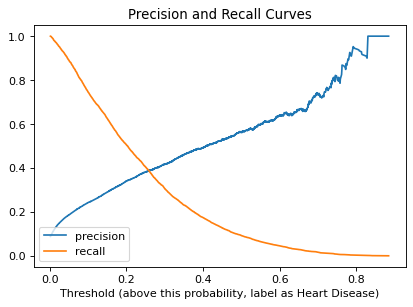

In [165]:
from sklearn.metrics import precision_recall_curve
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, final_model.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as Heart Disease)');
plt.title('Precision and Recall Curves');

In [156]:
#### Assign a cost to TP,FP,FN,TN . .

# TP : 50000 (some people )
# FN : 500000  
# TN : 0 
# FP : 10000
    
#costs=[np.sum(conf_mat[i]*[[0,5],[500,0]]) for i in range(len(conf_mat))]

cost_list=[]
for i in np.arange(0,1,.01):
    preds = final_model.predict_proba(X_test)[:,1] >= i
    conf_mat=confusion_matrix(y_test, preds )
    cost_list.append(np.sum(conf_mat*[[0,10000],[500000,50000]]))

/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgb

/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgb

/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgb

/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgb

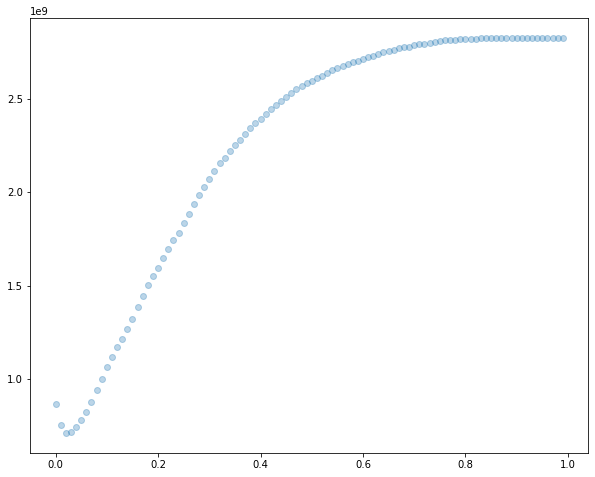

In [158]:
plt.figure(figsize=(10,8))
plt.scatter(np.arange(0,1,.01),cost_list,alpha=.3);

In [160]:
np.arange(0,1,.01)[np.argmin(cost_list)]


0.02

In [162]:
preds = final_model.predict_proba(X_test)[:,1] >= .02
conf_mat=confusion_matrix(y_test, preds )



/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


array([[24947, 33361],
       [  212,  5439]])

In [ ]:
#  https://www.cbsnews.com/news/how-much-would-a-heart-attack-cost-you/#:~:text=According%20to%20an%20article%20from,%2D%2Dis%20about%20%241%20million.

In [166]:
from sklearn.metrics import recall_score, precision_score

/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


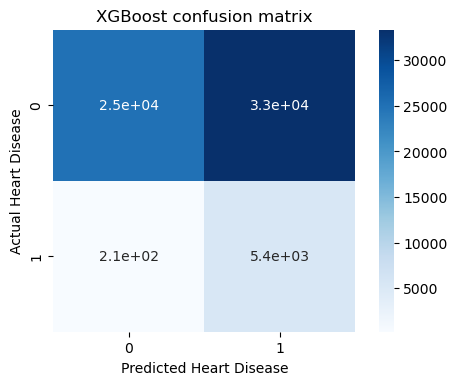

In [170]:
final_confusion = confusion_matrix(y_test, final_model.predict_proba(X_test)[:,1] >= .02)
plt.figure(dpi=100)
sns.heatmap(final_confusion, cmap=plt.cm.Blues, annot=True, square=True,
           xticklabels=clf.classes_,
           yticklabels=clf.classes_)

plt.xlabel('Predicted Heart Disease')
plt.ylabel('Actual Heart Disease')
plt.title('XGBoost confusion matrix');

In [171]:
final_confusion

array([[24947, 33361],
       [  212,  5439]])

In [174]:
Recall_score=(5439)/(5439+212)
Recall_score

0.9624845160148646

In [175]:
Precision_score=(5439)/(5439+33361)
Precision_score

0.14018041237113402